In [ ]:
from google.colab import drive
import zipfile
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score



In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/groupproject.zip

Streaming output truncated to the last 5000 lines.
  inflating: Group_Project_Data/Train/Fake/img_2189.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_2189.png  
  inflating: Group_Project_Data/Train/Fake/img_460.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_460.png  
  inflating: Group_Project_Data/Train/Fake/img_1480.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_1480.png  
  inflating: Group_Project_Data/Train/Fake/img_1494.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_1494.png  
  inflating: Group_Project_Data/Train/Fake/img_474.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_474.png  
  inflating: Group_Project_Data/Train/Fake/img_312.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_312.png  
  inflating: Group_Project_Data/Train/Fake/img_2823.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_2823.png  
  inflating: Group_Project_Data/Train/Fake/img_1319.png  
  inflat

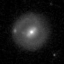

In [ ]:
img = tf.keras.preprocessing.image.load_img('Group_Project_Data/Train/Real/img_0.png')
img


In [ ]:
# Create the dataset using the image directory path
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory="Group_Project_Data/Train",
    labels="inferred",
    label_mode="binary",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=100,
    color_mode='grayscale',
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory="Group_Project_Data/Valid",
    labels="inferred",
    label_mode="binary",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=100,
    color_mode='grayscale'
)


# Print the class names
class_names = train_dataset.class_names
print(class_names)

Found 6000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
['Fake', 'Real']


In [ ]:
# Load the training data into x_train and y_train variables
x_train = []
y_train = []
for images, labels in train_dataset:
    x_train.append(images.numpy())
    y_train.append(labels.numpy())

x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

# Load the validation data into x_val and y_val variables
x_val = []
y_val = []
for images, labels in validation_dataset:
    x_val.append(images.numpy())
    y_val.append(labels.numpy())

x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)

x_train = x_train/255.
x_val = x_val/255.

In [ ]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=20, batch_size=64)
print(history.history.keys)

Epoch 1/20
188/188 [==============================] - 15s 13ms/step - loss: 0.7680 - accuracy: 0.9657 - val_loss: 0.0163 - val_accuracy: 0.9955
Epoch 2/20
188/188 [==============================] - 2s 11ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0188 - val_accuracy: 0.9970
Epoch 3/20
188/188 [==============================] - 3s 15ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0147 - val_accuracy: 0.9980
Epoch 4/20
188/188 [==============================] - 3s 15ms/step - loss: 0.0070 - accuracy: 0.9980 - val_loss: 0.0238 - val_accuracy: 0.9980
Epoch 5/20
188/188 [==============================] - 2s 10ms/step - loss: 0.0145 - accuracy: 0.9955 - val_loss: 0.1362 - val_accuracy: 0.9860
Epoch 6/20
188/188 [==============================] - 2s 10ms/step - loss: 0.0201 - accuracy: 0.9963 - val_loss: 0.0182 - val_accuracy: 0.9970
Epoch 7/20
188/188 [==============================] - 2s 11ms/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.0223 - val_accuracy: 0.996

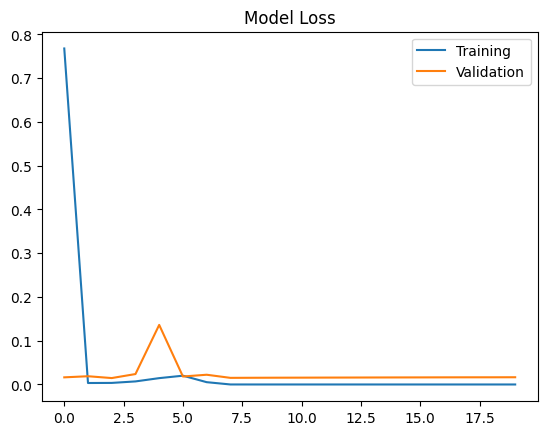

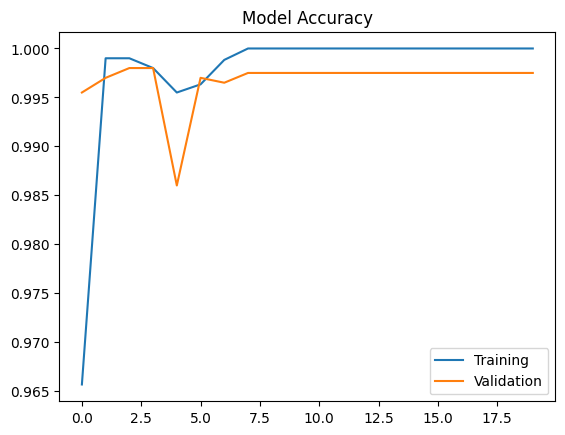

63/63 [==============================] - 0s 2ms/step
Precision: 0.5
Recall: 1.0
F1 score: 0.6666666666666666


In [ ]:
# Plot for Model Loss
plt.figure()
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.title('Model Loss')

# Plot for Model Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.title('Model Accuracy')

plt.show()

# Predict on validation set
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Precision, recall, and F1 score
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)


print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)







63/63 [==============================] - 0s 3ms/step


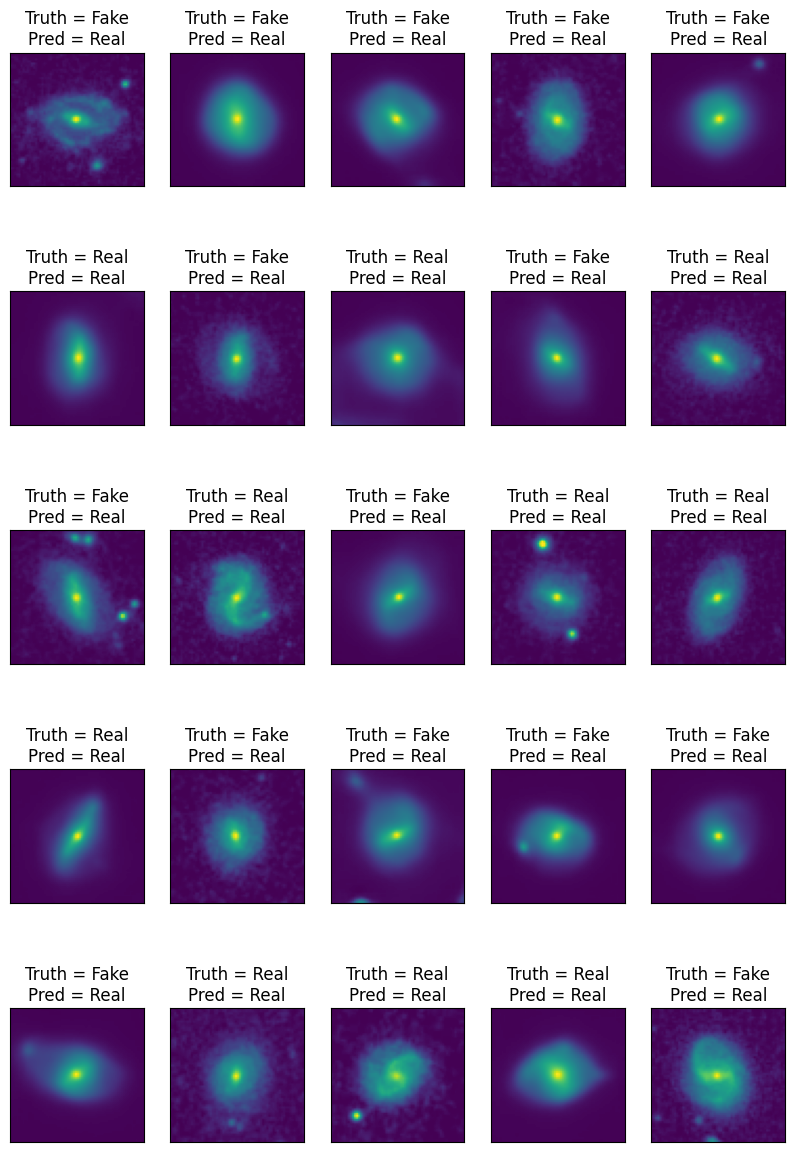

In [ ]:
# Testing the model to predict 
y_pred = model.predict(x_val)
y_pred_label = np.round(y_pred)

# Plotting images with labels telling the truth and predicted values with some 
# testing images for each class
f, ax = plt.subplots(5,5, figsize=(10, 15))
ax = ax.flatten()

# Looping the selected images from each class to show on the plot
for i in range(25):
    ax[i].imshow(x_train[i,:,:])
    ax[i].set_title(f'Truth = {class_names[int(y_val[i])]}\nPred = {class_names[int(y_pred_label[i])]}')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()

In [ ]:
# Saving your model

model.save('/content/Group_48_Model_Trained')

In [ ]:
# Test saved model

loaded_model = tf.keras.models.load_model('/content/Group_48_Model_Trained')
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
# zip the model
!zip -r /content/Group_48_Model_Trained.zip /content/Group_48_Model_Trained

  adding: content/Group_48_Model_Trained/ (stored 0%)
  adding: content/Group_48_Model_Trained/assets/ (stored 0%)
  adding: content/Group_48_Model_Trained/keras_metadata.pb (deflated 90%)
  adding: content/Group_48_Model_Trained/saved_model.pb (deflated 88%)
  adding: content/Group_48_Model_Trained/fingerprint.pb (stored 0%)
  adding: content/Group_48_Model_Trained/variables/ (stored 0%)
  adding: content/Group_48_Model_Trained/variables/variables.data-00000-of-00001 (deflated 37%)
  adding: content/Group_48_Model_Trained/variables/variables.index (deflated 62%)
